<a href="https://colab.research.google.com/github/kaidalisohaib/AICohortW24/blob/Sohaib/notebooks/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.1


## Step 1: Import necessary libraries

In [1]:
import os
import time
import logging
import shutil
from math import ceil
from datetime import datetime
from importlib import reload  # Not needed in Python 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reload(logging)
# %matplotlib inline

sns.set_context("notebook")
sns.set_theme(style="ticks")
sns.color_palette("rocket", as_cmap=True)


# Set up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S', 
                    handlers=[
        logging.StreamHandler()
    ],)
logger = logging.getLogger(__name__)

## Step 2: Load the dataset

In [2]:
input_file_path = "https://raw.githubusercontent.com/kaidalisohaib/DAIJChallenge24/main/data/sdg_index_2000-2022.csv"

df = pd.read_csv(input_file_path, header=0)

df.head()

all_columns = df.columns.tolist()

# Define target column
target_column = "goal_11_score"

# Get all feature columns except one
all_features = all_columns
all_features.remove(target_column)

# Get numerical columns
numerical_cols = all_features.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Get non-numerical (categorical) columns
categorical_cols = all_features.select_dtypes(include=["object"]).columns.tolist()

print("All the columns:\n", all_columns)
print("Target column:\n", target_column)
print("Features columns:\n", all_features)
print("Numerical Columns:\n", numerical_cols)
print("Categorical Columns:\n", categorical_cols)

All the columns:
 ['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
Target column:
 goal_11_score
Features columns:
 ['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
Numerical Columns:
 ['year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'go

## Step 3: Data exploration

### 3.2 Data Visualization

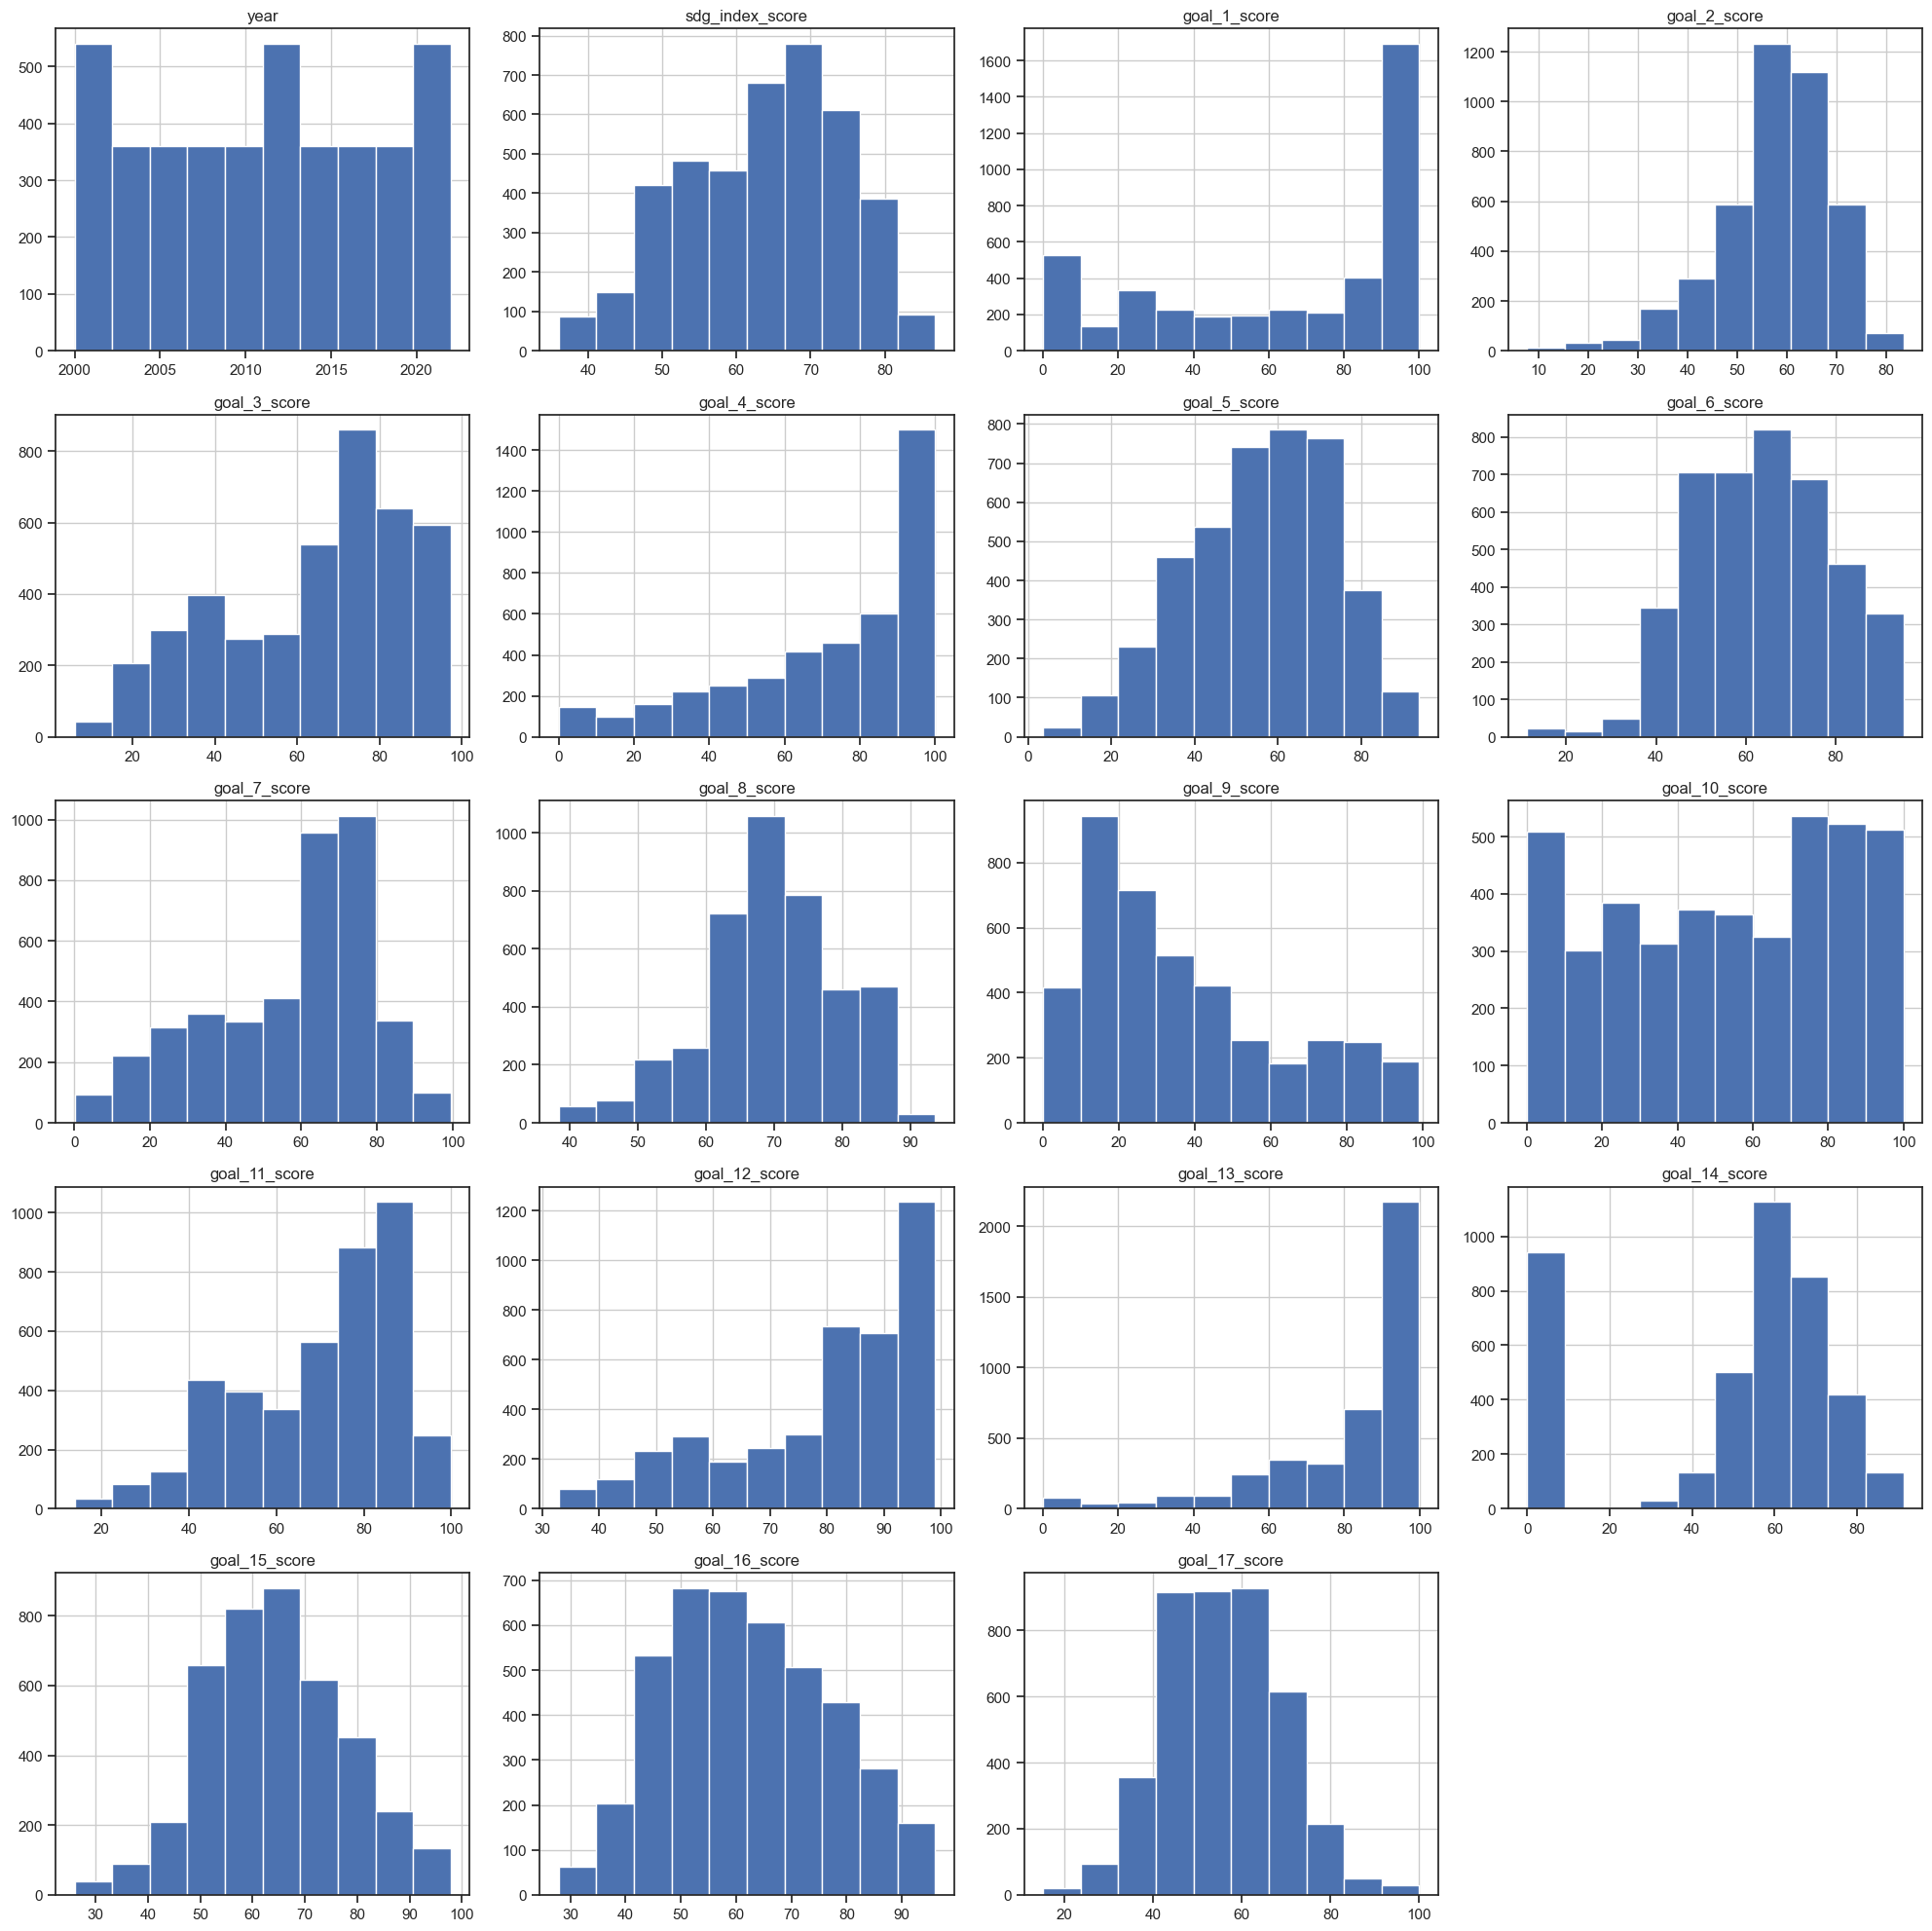

In [6]:
sample_df = df.sample(frac=1.0, random_state=42)

df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()


### 3.3 Pattern identification

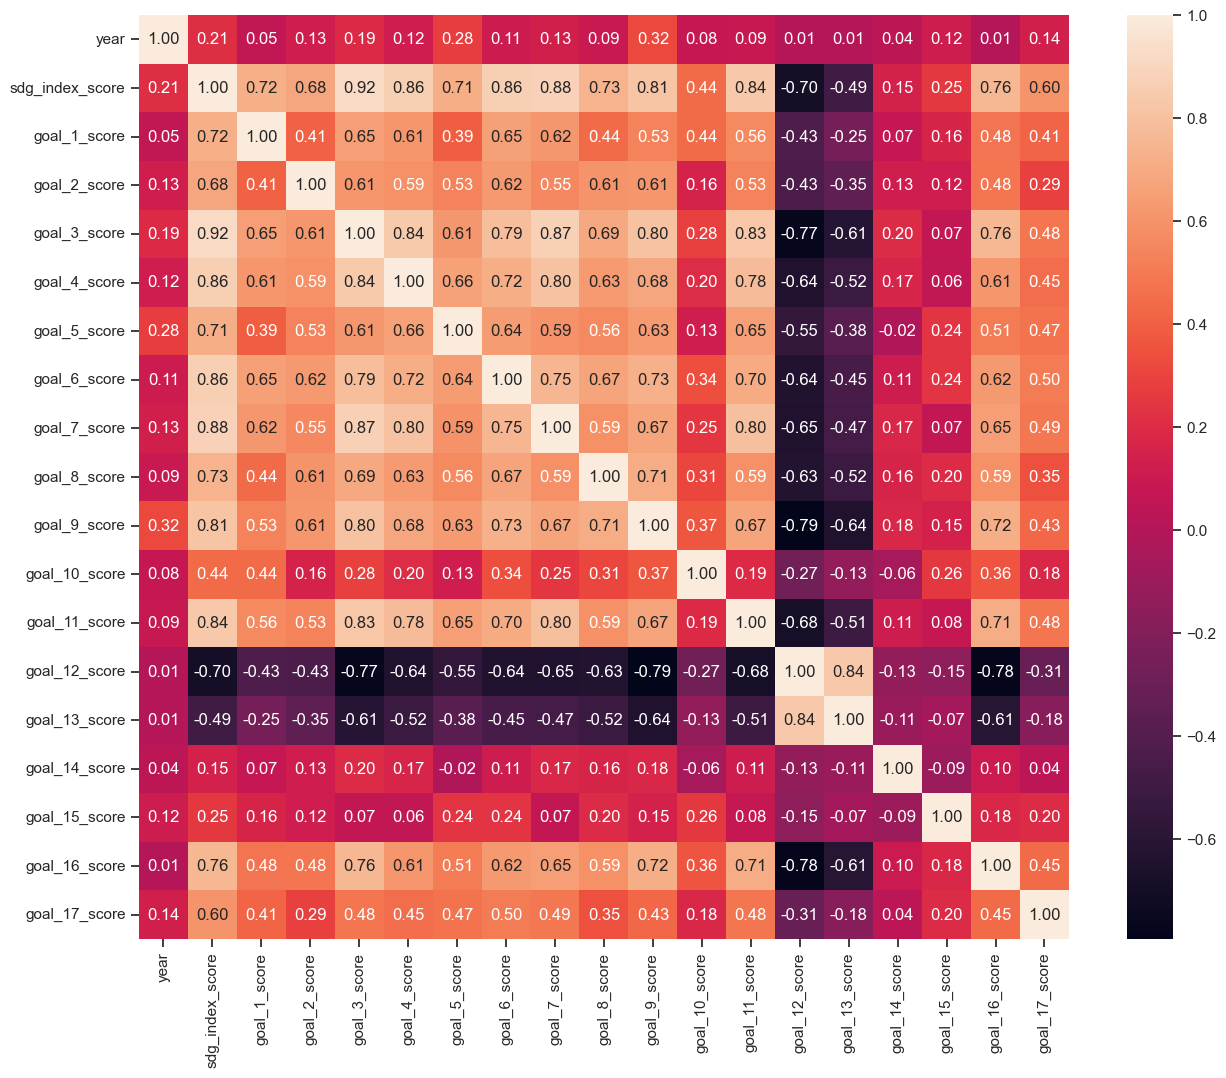

In [8]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f")
plt.show()

Water and Air Quality Data Columns: ['City', 'Region', 'Country', 'AirQuality', 'WaterPollution']
SDG Report Data Columns: ['country_code', 'country', 'region', 'overall_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
